# Count Rate vs Voltage and the Dead Time of GM Tube
Graph the relationship between count rate and the high voltage. As well as calculate the dead time of the Geiger counter

In [8]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# import data as a numpy array

data = np.genfromtxt('exp2a.tsv', skip_header = 11)
voltage = data[:,1] # High Voltage
rate = data[:,2]/60 # number of counts

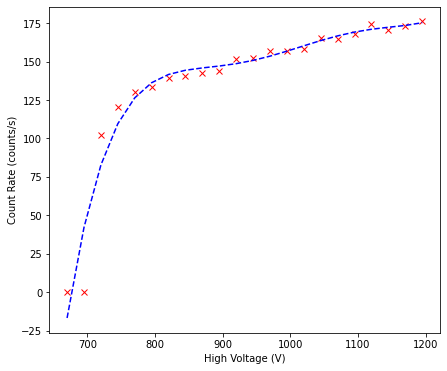

In [42]:
# plot counts vs voltage curve

plt.figure(figsize=(7, 6))
plt.plot(voltage, rate, 'x', label='Data', color='red')
plt.xlabel("High Voltage (V)")
plt.ylabel("Count Rate (counts/s)")

z = np.polyfit(voltage, rate, 5)
p = np.poly1d(z)
plt.plot(voltage, p(voltage),"b--")

In [27]:
# import data for dead time caculations.
# since only 9 measurements were taken, the data was manually typed

#count rates
n_a = [9404/60, 8668/60, 9079/60] # n(A)
n_ab = [11722/60, 11124/60, 11314/60] # n(AB)
n_b = [2565/60, 2704/60, 2577/60] # n(B)

# uncertainty of each count rate
delta_a = (max(n_a)-min(n_a))/2
delta_ab = (max(n_ab)-min(n_ab))/2
delta_b = (max(n_b)-min(n_b))/2

# find the average value of the count rates of each source
a = sum(n_a) / 3
ab = sum(n_ab) / 3
b = sum(n_b) / 3

tau = (a+b-ab)/(2*a*b) # calculate dead time
# calculate uncertainty of dead time
delta_tau = tau*(delta_a/a)+(delta_ab/ab)+(delta_b/b)

#print values
print('n(A) = ' + str(a) + u"\u00B1" + str(delta_a) + ' /s')
print('n(AB) = ' + str(ab) + u"\u00B1" + str(delta_ab) + ' /s')
print('n(B) = ' + str(b) + u"\u00B1" + str(delta_b) + ' /s')
print(u"\u03C4" + ' = ' + str(tau) + u"\u00B1" + str(delta_tau) + ' s')

n(A) = 150.83888888888887±6.133333333333326 /s
n(AB) = 189.77777777777774±4.983333333333334 /s
n(B) = 43.58888888888888±1.158333333333335 /s
τ = 0.00035361756875355036±0.052847211288721135 s
